# Fundamentals of Data Analysis Assessment 2019 - Tips Dataset 

## Introduction 
In the US, the tip rate for restaurants with table service is 15% or more of the total bill, based on the quality of service. If you receive exceptional service, 20-25% is customary[8]. Tips in restaurants are influenced by many factors including type of restaurant, quality of food and most importantly service.  One waiter recorded 244 tips and several variables over a 2.5 month period working in one restaurant. The restaurant located in a suburban shopping mall, was one of a national chain and served a varied menu. In observance of local law, the restaurant offered seating in a non-smoking section to patrons who requested it. The data was assigned to those days and during those times when the food server was routinely assigned to work [10].  The data was reported in a collection of case studies for business statistics [9]. 

Is it possible to isolate the criteria that govern tip rate and increase tips for the waiter? This project interrogates the tips [6] dataset and utilises Python [1], seaborn [5] and jupyter [4] packages to analyse if a variable can be isolated that influences tip %. 

## Import libraries

In [1]:
# Import numpy, matplotlib, seaborn and pandas
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

## Raw Data

In [3]:
# Import tips dataset from Seaborn and call it tips
tips = sns.load_dataset("tips")

### Format of the dataset

The below command (tips.info) summarises the dataset.  It comprises 244 rows and 7 columns.  

4 columns are categories:
 - sex - Male/Female
 - smoker - Yes or No
 - day - Thursday through to Sunday
 - time - lunch or dinner
 
3 columns are numeric:
 - total_bill (float)
 - tip (float)
 - size (integer)

In [4]:
# Summarise the Dataframe
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
# Visually view the dataset
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Descriptive statistics

In [6]:
# Describe the dataset using pandas describe()
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Observations of the dataset

 - All groups paid a tip
 - The average bill is 19.79  
 - The average tip is 3.00 which equates to 15.2%
 - Minimum tip is 1.00 
 - Maximum tip is 10.0
 - Average party size is 2.5

The restaurant appears to be inexpensive with an average bill of 19.79.  Average tip is 15.2 % which is representative of the cultural expectation of 15%.  The scatterplot below also demonstrates the correlation visually - the values are centred around the mean.

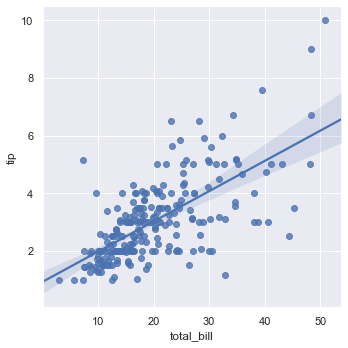

In [7]:
# Plot a scatterplot to include a linear regression model (and its uncertainty) using lmplot()
# Modified from https://seaborn.pydata.org/introduction.html
sns.lmplot(x="total_bill", y="tip", data=tips)

### Correlation of Total Bill versus Tip
One way to categorically determine if correlation between total bill and tip exists, is to include a new variable - target tip of 15%.  This will highlight if customers paid the expected tip.

In [8]:
# Create a  new variable - tip target
tips["tip_t"] = tips["total_bill"] * .15

The plot below demonstrates the correlation between tip and target tip.  The values are clustered around 15% - there are many tips to either side of the 15% but the relationship cannot be denied. There is a definitive relationship between total bill and tip.  There are a few tips that are out of sync with the rest of the population, but these could be viewed as outliers. Other variables now need to be brought to determine if they have an influencing factor.

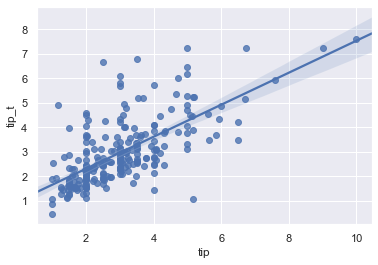

In [9]:
# Modified from https://seaborn.pydata.org/introduction.html
sns.regplot(x="tip", y="tip_t", data=tips)

## Regression

Regression analysis is a way of mathematically sorting out which variables have an impact[11].  The initial analysis above demonstrates that there is a clear correlation between total bill and tip amount.   Tipping is ingrained into the American culture and that is displayed above as all customers paid a tip.  However, we need to dig a bit deeper and investigate if any underlying trends or dynamics influenced the tip received. All four categories (sex, smoker, day & time) are sliced in order to provide insights.

### Slice the Data by  Day and Time
Pandas[7] groupby function is used to slice the data below.  The following is observed:

#### Group size

 - Thursday is the busiest day for lunch with 61 groups served.  
 - Only 7 groups had lunch on Friday. 
 - No one was served lunch Saturday or Sunday.
 - Thursday dinner only had one group. 
 
#### Group tips
 - 168.83 received in tips on Thursday lunchtime versus a target of 161.63.  
 - 260.40 and 247.39 received for Saturday and Sunday dinner versus targets of 266.76 and 244.07 respectively.
 - No one was served lunch Saturday or Sunday meaning the server received no tips. 
 - Saturday and Sunday are the busiest times for dinner with 87 and 76 groups served respectively. 

In [10]:
# Split the groups by day and time using groupby
tips.groupby(['time', 'day']).size()

time    day 
Lunch   Thur    61
        Fri      7
Dinner  Thur     1
        Fri     12
        Sat     87
        Sun     76
dtype: int64

In [11]:
# Split the data by day and time and sum the numerical values using groupby
tips.groupby(['day', 'time']).sum()

total_bill     tip   size     tip_t
day  time                                       
Thur Lunch      1077.55  168.83  150.0  161.6325
     Dinner       18.78    3.00    2.0    2.8170
Fri  Lunch        89.92   16.68   14.0   13.4880
     Dinner      235.96   35.28   26.0   35.3940
Sat  Lunch          NaN     NaN    NaN       NaN
     Dinner     1778.40  260.40  219.0  266.7600
Sun  Lunch          NaN     NaN    NaN       NaN
     Dinner     1627.16  247.39  216.0  244.0740

### Slice the Data by Gender and Smoker status

Using Pandas[7] groupby function to slice the data by gender and smoker status, the following is observed:

- The highest tips received were from male non smokers - 302 was received versus a target of 287.96.  
- The second highest tips were from male smokers - 183.07 versus a target of 200.56.
- The third highest were female non smokers - 149.77 versus 146.65.
- The lowest tips received were from female smokers - 96.74 versus 88.99.

In [12]:
# Split the data by gender and smoker using groupby.
tips.groupby(['sex', 'smoker']).sum()

total_bill     tip  size     tip_t
sex    smoker                                    
Male   Yes        1337.07  183.07   150  200.5605
       No         1919.75  302.00   263  287.9625
Female Yes         593.27   96.74    74   88.9905
       No          977.68  149.77   140  146.6520

### Slice the Data by Group size

Using Pandas[7] groupby function to slice the data by group size, the following is observed:
- Most of the tips received are from party sizes of 2 - 402.84 was received in tips versus a target of 384.88.  Behind this are groups of 4 tipping 153.01 versus target of 158.8.  The restaurant is therefore attractive to couples or it is unable to cater effectively for larger group sizes.

In [13]:
tips.groupby(['size']).sum()

,total_bill,tip,tip_t
size,,,
1,28.97,5.75,4.3455
2,2565.89,402.84,384.8835
3,884.55,128.94,132.6825
4,1058.70,153.01,158.8050
5,150.34,20.14,22.5510
6,139.32,20.90,20.8980


###  Regression Summary
##### Main observations:

 - Highest volume of groups and tips were received Saturday night.  
 - Highest volume of groups and tips were received from male non smokers
 - Highest volume of groups and tips were from groups of 2
 - No one was served lunch Saturday or Sunday meaning the server received no tips. 
  
Adding variables provides further insights into the dataset but it has also raised more questions.  Total bill and tip are clearly correlated but can it be definitively stated that the variables contribute to the variation in tip amount?  The categorisation of gender and smoker status is not definitive as the breakdown within those populations is not given.  The restaurant is popular for groups of 2 for Thursday lunch and Saturday and Sunday dinners. It seems likely that external factors are contributing.

## Analysis of the Tips Dataset

Matplotlib's describe() summarises the dataset well and confirms that the cultural expectation of 15% is achieved overall.  There is variation in tip % received by the server.  Can the server use this data to determine how to maximise their tips i.e. what customers should be targeted with excellent service especially on busy days?  The fundamental question is do any of the variables of gender, smoker status, group size, day or time impact tip amount?

From the analysis above the highest tips are received from tables of 2 in the non smoking section on a Saturday night with a male paying.  However, this conclusion is difficult to stand over due to several factors that can be discounted:
  
 - The data does not provide a breakdown of gender within the groups therefore it cannot be categorically stated that gender has an impact.  The gender of the person who paid is recorded not the breakdown of the group.  To include gender would not be representative of the total population.
 - Likewise, smoker status - the breakdown of smokers and non smokers within the group is not provided. Also, perhaps a number of groups had to sit in the smoking section due to non availability of tables in the non smoking section and vice versa. 
 - Saturday night will always be the busiest night for most restaurants resulting in the highest tips. 
 
The only remaining variable with a definitive correlation is group size.  The highest tips were received from groups of 2 but most groups are groups of two.  The restaurant appears to attract couples. It is not a fair comparison.

#### Group Size by Day
Does size of group influence tip amount? The highest tips were received from groups of 2 but the majority of groups are 2 people.  The data is not definitive.

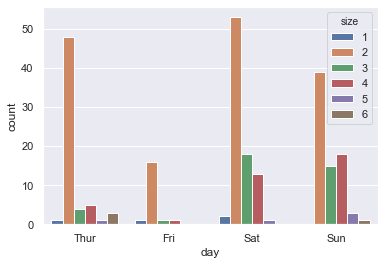

In [14]:
# Using Seaborn Countplot, view group size by day
sns.countplot(x='day',hue='size' ,data=tips)

### Comparative Analysis

A publication analysing the tips dataset (Ggobi.org[13]) found that the only important variable emerging was size -  as size increases, tip rate decreases.   Dicook.public [10]  came to the same conclusion.  However, is it that clear cut?  Although groups of 2 paid higher tips, it is probable that service levels for groups of 2 was better.  The ratio of customers to the server is lower therefore the service is better. The influencing factors is not any of the variables in the tips data set but subjective factors. 
 
Researchgate[12] found that people tip only because of social and psychological motivations, and not because of strategic reasons and future service considerations to ensure good future service.  This ties in with the descriptive and visual analysis above - the strength of the relationship is clear, but it is quite feasible that the tip amount interacts with another unconsidered variable e.g. ambience.

Service is subjective and relates to an overall experience. The controls in the dataset are the waiter and the restaurant. It is assumed that the same quality of food and service is provided to all customers which is difficult to achieve due to a variety of qualitative factors e.g. chef that is on duty, cleaning staff etc.  

In order to provide the server with higher tips is to provide feedback to the manager.   The key to higher tips (and revenue therefore) is increased customer volumes.  One key observation is that no one was served lunch Saturday or Sunday meaning the server received no tips. This is very odd given that weekends should be the busiest time for restaurants. It would seem the restaurant is not attractive to young families or teenagers who tend to go on outings at the weekend at lunch.  It may be that the restaurant's business model needs to be reviewed to attract a wider variety of groups and staffed appropriately.

## Conclusion

There is a definitive relationship between total bill and tip.  Customers view 15% as a target or guideline and then decide given their experience, what amount they should leave as a tip.  Sex, smoker, time and day do provide insights into tipping behaviour but are not definitive.  Tipping is based on customer service not customer attributes.

## References

 - [1] Python Software Foundation. Welcome to python.org.
https://www.python.org/.
 - [2] GMIT. Quality assurance framework.
https://www.gmit.ie/general/quality-assurance-framework.
 - [3] GitHub Guides. Mastering markdown.
https://guides.github.com/features/mastering-markdown/.
 - [4] Project Jupyter. Project jupyter.
https://jupyter.org/.
 - [5] Seaborn.
https://seaborn.pydata.org/.
 - [6] Michael Waskom. Tips data set.
https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.
 - [7] Pandas Data Analysis library
 https://pandas.pydata.org.
 - [8] Tripadvisor
 https://www.tripadvisor.ie/Travel-g191-s606/United-States:Tipping.And.Etiquette.html
 - [9] Bryant, P. G. and Smith, M (1995)
 Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing
 - [10] Dicook.public.iastate.edu
 https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf
 - [11] Harvard Business Review
  https://hbr.org/2015/11/a-refresher-on-regression-analysis
 - [12] Research gate https://www.researchgate.net/publication/227345007_Do_people_tip_because_of_psychological_or_strategic_motivations_An_empirical_analysis_of_restaurant_tipping
 - [13] Ggobi.org
http://www.ggobi.org/book/chap-data.pdf

## The End